<a href="https://colab.research.google.com/github/akashravichandran/colab-experiments/blob/master/english_to_tamil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import subprocess
# import argparse
# import os

# import pandas as pd

# # parser = argparse.ArgumentParser()
# # parser.add_argument('-s', help='ISO 639-3 code for a source language')
# # parser.add_argument('-t', help='ISO 639-3 code for a target language')
# # parser.add_argument('-data_dir', default='./data', help='Data directory')


# if __name__ == '__main__':
#     # args = parser.parse_args()
#     source_lang = 'eng'
#     target_lang = 'tam'
#     data_dir = '/content/data/'

#     # download if sentences are not here
#     sentences_path = os.path.join(data_dir, 'sentences.csv')
#     if not os.path.isfile(sentences_path):
#         if not os.path.isfile(os.path.join(data_dir, 'sentences.tar.bz2')):
#             subprocess.run(
#                 "wget https://downloads.tatoeba.org/exports/sentences.tar.bz2 -P " + data_dir,
#                 shell=True)

#         subprocess.run(
#             "tar xvjC {0} -f {0}/sentences.tar.bz2".format(data_dir), shell=True)

#     # download if links are not here
#     links_path = os.path.join(data_dir, 'links.csv')
#     if not os.path.isfile(links_path):
#         if not os.path.isfile(os.path.join(data_dir, 'links.tar.bz2')):
#             subprocess.run(
#                 "wget https://downloads.tatoeba.org/exports/links.tar.bz2 -P " + data_dir,
#                 shell=True)

#         subprocess.run("tar xvjC {0} -f {0}/links.tar.bz2".format(data_dir), shell=True)

#     # read all data
#     sentences = pd.read_csv(sentences_path, names=['id', 'lang', 'text'], header=None, delimiter='\t')
#     links = pd.read_csv(links_path, names=['sent_id', 'tran_id'], header=None, delimiter='\t')

#     # extract source - target connected
#     source_sentences = sentences[sentences.lang == source_lang]
#     source_sentences = source_sentences.merge(links, left_on='id', right_on='sent_id')
#     target_sentences = sentences[sentences.lang == target_lang]

#     bilang_sentences = source_sentences.merge(target_sentences, left_on='tran_id',
#                                               right_on='id',
#                                               suffixes=[source_lang, target_lang])
#     bilang_sentences = bilang_sentences[['text' + source_lang, 'text' + target_lang]]

#     # save results
#     file_name = os.path.join(data_dir, '{source}-{target}.csv'.format(source=source_lang, target=target_lang))
#     bilang_sentences.to_csv(file_name, index=False, sep='\t')


In [1]:
import pandas as pd
import os

source_lang = 'eng'
target_lang = 'tam'
data_dir = '/content/data/'

corpus = pd.read_csv(os.path.join(data_dir, '{}-{}.csv'.format(source_lang, target_lang)), delimiter='\t')

In [2]:
corpus

,texteng,texttam
0,Most people think I'm crazy.,நிறைய மக்கள் நான் பைத்தியம் என்று எண்ணுகிறார்கள்
1,I love you.,நான் உன்னை காதலிக்கிறேன்.
2,Where are you?,நீ எங்கே இருக்கிறாய்?
3,When did you come to Japan?,நீ எப்பொழுது ஜப்பான் வந்தாய்?
4,When is your birthday?,உங்கள் பிறந்த நாள் எப்போது ?
...,...,...
312,I will sleep.,நான் தூங்குவேன்.
313,They told me why they needed my help.,அவர்கள் எதனால் என் உதவி தேவைப்பட்டது என்று கூற...
314,Tom drank with us until after midnight.,டாம் நள்ளிரவு வரை எங்களுடன் குடித்தார்.
315,Tom's car was manufactured in the 1980s.,டாமின் கார் 1980 களில் தயாரிக்கப்பட்டது.


In [3]:
SOS_token = '<start>'
EOS_token = '<end>'
UNK_token = '<unk>'
PAD_token = '<pad>'

SOS_idx = 0
EOS_idx = 1
UNK_idx = 2
PAD_idx = 3

class Vocab:
    def __init__(self):
        self.index2word = {
            SOS_idx: SOS_token,
            EOS_idx: EOS_token,
            UNK_idx: UNK_token,
            PAD_idx: PAD_token
        }
        self.word2index = {v: k for k, v in self.index2word.items()}

    def index_words(self, words):
        for word in words:
            self.index_word(word)

    def index_word(self, word):
        if word not in self.word2index:
            n_words = len(self)
            self.word2index[word] = n_words
            self.index2word[n_words] = word

    def __len__(self):
        assert len(self.index2word) == len(self.word2index)
        return len(self.index2word)

    def unidex_words(self, indices):
        return [self.index2word[i] for i in indices]

    def to_file(self, filename):
        values = [w for w, k in sorted(list(self.word2index.items())[5:])]
        with open(filename, 'w') as f:
            f.write('\n'.join(values))

    @classmethod
    def from_file(cls, filename):
        vocab = Vocab()
        with open(filename, 'r') as f:
            words = [l.strip() for l in f.readlines()]
            vocab.index_words(words)

In [4]:
# ! pip install torch==1.3.1+cu100 torchvision==0.4.2+cu100 -f https://download.pytorch.org/whl/torch_stable.html

In [5]:
! pip install inltk
from inltk.inltk import setup
setup('ta')

RuntimeError: ignored

We'll only do this for the first time.


In [6]:
from inltk.inltk import tokenize
def tamil_tokenize(text):
  return tokenize(text, "ta")

In [7]:
import nltk
# nltk.download('')
# from tokenize_uk import tokenize_words
import pandas as pd


max_length = 10
min_word_count = 1

tokenizers = {
    'tam': tamil_tokenize,
    'eng': nltk.tokenize.WordPunctTokenizer().tokenize
}

def preprocess_corpus(sents, tokenizer, min_word_count):
    n_words = {}

    sents_tokenized = []
    for sent in sents:
        sent_tokenized = [w.lower() for w in tokenizer(sent)]

        sents_tokenized.append(sent_tokenized)

        for word in sent_tokenized:
            if word in n_words:
                n_words[word] += 1
            else:
                n_words[word] = 1

    for i, sent_tokenized in enumerate(sents_tokenized):
        sent_tokenized = [t if n_words[t] >= min_word_count else UNK_token for t in sent_tokenized]
        sents_tokenized[i] = sent_tokenized

    return sents_tokenized

def read_vocab(sents):
    vocab = Vocab()
    for sent in sents:
        vocab.index_words(sent)

    return vocab

source_sents = preprocess_corpus(corpus['text' + source_lang], tokenizers[source_lang], min_word_count)
target_sents = preprocess_corpus(corpus['text' + target_lang], tokenizers[target_lang], min_word_count)

# Using set to remove duplicates
source_sents, target_sents = zip(
    *sorted({(tuple(s), tuple(t)) for s, t in zip(source_sents, target_sents)
              if len(s) <= max_length and len(t) <= max_length})
)

source_vocab = read_vocab(source_sents)
target_vocab = read_vocab(target_sents)

target_vocab.to_file(os.path.join(data_dir, '{}.vocab.txt'.format(target_lang)))
source_vocab.to_file(os.path.join(data_dir, '{}.vocab.txt'.format(source_lang)))

print('Corpus length: {}\nSource vocabulary size: {}\nTarget vocabulary size: {}'.format(
    len(source_sents), len(source_vocab.word2index), len(target_vocab.word2index)
))
examples = list(zip(source_sents, target_sents))[80:90]
for source, target in examples:
    print('Source: "{}", target: "{}"'.format(' '.join(source), ' '.join(target)))

Corpus length: 243
Source vocabulary size: 391
Target vocabulary size: 648
Source: "i am not a guide .", target: "▁நான் ▁ஒரு ▁வழி ▁காட்டி ▁இல்லை"
Source: "i am not being guided .", target: "▁நான் ▁வழி ▁காட்ட ப் ▁பட்டு க் ▁கொண்டு ▁இருக்க ▁ வில்லை"
Source: "i am not guided .", target: "▁நான் ▁வழி ▁காட்ட ப் ▁பட ▁ வில்லை"
Source: "i am sleeping .", target: "▁நான் ▁தூ ங்க ுகிற ேன் ."
Source: "i arrived ahead of the others .", target: "▁மற்றவர் களுக்கு ▁முன்ன ே ▁நான் ▁வந்த ேன்"
Source: "i ate too much .", target: "▁நான் ▁நிறைய ▁சாப்பிட ் டே ன்"
Source: "i came to buy vegetables .", target: "▁நான் ▁காய்கறி ▁வாங்க ▁கடை க்குப் ▁போன ேன்"
Source: "i didn ' t inform them .", target: "▁நான் ▁அவர் களிடம் ▁சொல்ல வில்லை ."
Source: "i didn ' t let them know .", target: "▁நான் ▁அவர் களிடம் ▁தெரிவிக்க வில்லை ."
Source: "i didn ' t tell them .", target: "▁நான் ▁அவர் களிடம் ▁சொல்ல வில்லை ."


In [8]:
source_to_target = {}
for source, target in zip(source_sents, target_sents):
    if source in source_to_target:
        source_to_target[source].append(target)
    else:
        source_to_target[source] = [target]

source_sents, target_sents = zip(*source_to_target.items())
len(source_sents)

242

In [9]:
import numpy as np

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

source_length = len(source_sents)
inidices = np.random.permutation(source_length)

training_indices = inidices[:int(source_length*0.8)]
dev_indices = inidices[int(source_length*0.8):int(source_length*0.86)]
test_indices = inidices[int(source_length*0.86):]

training_source = [source_sents[i] for i in training_indices]
dev_source = [source_sents[i] for i in dev_indices]
test_source = [source_sents[i] for i in test_indices]

training_target = [target_sents[i] for i in training_indices]
dev_target = [target_sents[i] for i in dev_indices]
test_target = [target_sents[i] for i in test_indices]

# Unwrap training examples
training_t = []
training_s = []
for source, tt in zip(training_source, training_target):
    for target in tt:
        training_t.append(target)
        training_s.append(source)

training_source = training_s
training_target = training_t

In [18]:
training_target

[('▁அனைவரும்', '▁வெளியே', '▁வி', 'ரை', 'ந்த', 'னர்', '.'),
 ('▁நாய்', '▁ஜா', 'க்கிர', 'தை', '!'),
 ('▁அவள்', '▁அவ', 'னோ', 'டு', '▁நடன', 'ம்', '▁ஆடி', 'னா', 'ள்'),
 ('▁நா', 'ங்கள்', '▁நடக்க', '▁ஆரம்பித்த', 'ோம்'),
 ('▁உ',
  'ங்கள்',
  '▁ஆங்கிலம்',
  '▁மேம்படுத்த',
  '▁வேண்டுமென',
  '▁விரும்ப',
  'ுகிற',
  'ீர்',
  'களா',
  '?'),
 ('▁டோ',
  'ம்',
  '▁நாள்',
  '▁முழுதும்',
  '▁வேலை',
  '▁செய்துகொண்ட',
  'ிருக்கிற',
  'ான்',
  '.'),
 ('▁இந்த', '▁சீ', 'டி', '▁அவள', 'ுக்கு', 'ச்', '▁சொந்தமான', 'து'),
 ('▁அவள்', '▁அவனை', 'க்', '▁கட', 'ித்த', 'ாள்'),
 ('▁வா', '▁எ', 'ங்களுக்கு', '▁உதவி', '▁செய்'),
 ('▁என்ன',
  '▁நடந்தது',
  '▁என்பதை',
  '▁தெரிந்து',
  '▁கொள்ள',
  '▁விரும்பி',
  'னே',
  'ன்',
  '.'),
 ('▁அவனுக்கு', '▁நீ', 'ச்சல்', '▁மீது', '▁பற்று', '▁உண்டு'),
 ('▁எ', 'ங்களுக்கு', '▁உணவு', '▁தட்டு', 'ப்பாடு', '▁ஏற்பட்டது'),
 ('▁நாம்', '▁எ', 'ங்கே', '▁இருக்க', 'ிறோம்', '?'),
 ('▁வா', 'யை', '▁மூ', 'டி', '▁கவன', 'ி'),
 ('▁நான்', '▁வழி', '▁காட்ட', 'ப்', '▁பட', '▁', 'வில்லை'),
 ('▁அவள', 'ுக்கு', '▁எட

In [44]:
import torch

def indexes_from_sentence(vocab, sentence):
    return [vocab.word2index[word] for word in sentence]

def tensor_from_sentence(vocab, sentence, max_seq_length):
    indexes = indexes_from_sentence(vocab, sentence)
    indexes.append(EOS_idx)
    indexes.insert(0, SOS_idx)
    # we need to have all sequences the same length to process them in batches
    if len(indexes) < max_seq_length:
        indexes += [PAD_idx] * (max_seq_length - len(indexes))
    tensor = torch.LongTensor(indexes)
    return tensor

def tensors_from_pair(source_sent, target_sent, max_seq_length):
    source_tensor = tensor_from_sentence(source_vocab, source_sent, max_seq_length).unsqueeze(1)
    target_tensor = tensor_from_sentence(target_vocab, target_sent, max_seq_length).unsqueeze(1)
    return (source_tensor, target_tensor)

max_seq_length = max_length + 2  # 2 for EOS_token and SOS_token

training = []
for source_sent, target_sent in zip(training_source, training_target):
    training.append(tensors_from_pair(source_sent, target_sent, max_seq_length))

x_training, y_training = zip(*training)
x_training = torch.transpose(torch.cat(x_training, dim=-1), 1, 0)
y_training = torch.transpose(torch.cat(y_training, dim=-1), 1, 0)
torch.save(x_training, os.path.join(data_dir, 'x_training.bin'))
torch.save(y_training, os.path.join(data_dir, 'y_training.bin'))

x_development = []
for source_sent in dev_source:
    tensor = tensor_from_sentence(source_vocab, source_sent, max_seq_length).unsqueeze(1)
    x_development.append(tensor)

x_development = torch.transpose(torch.cat(x_development, dim=-1), 1, 0)
torch.save(x_development, os.path.join(data_dir, 'x_development.bin'))

x_test = []
for source_sent in test_source:
    tensor = tensor_from_sentence(source_vocab, source_sent, max_seq_length).unsqueeze(1)
    x_test.append(tensor)

x_test = torch.transpose(torch.cat(x_test, dim=-1), 1, 0)
torch.save(x_test, os.path.join(data_dir, 'x_test.bin'))

USE_CUDA = False
if USE_CUDA:
    x_training = x_training.cuda()
    y_training = y_training.cuda()
    x_development = x_development.cuda()
    x_test = x_test.cuda()

In [45]:
import torch.nn as nn
import torch.nn.init as init

class EncoderRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, n_layers=1):
        super(EncoderRNN, self).__init__()

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, hidden_size)
        init.normal_(self.embedding.weight, 0.0, 0.2)

        self.lstm = nn.LSTM(
            hidden_size,
            int(hidden_size/2),  # Bi-directional processing will ouput vectors of double size, therefore I reduced output dimensionality
            num_layers=n_layers,
            batch_first=True,  # First dimension of input tensor will be treated as a batch dimension
            bidirectional=True
        )

    # word_inputs: (batch_size, seq_length), h: (h_or_c, layer_n_direction, batch, seq_length)
    def forward(self, word_inputs, hidden):         
        # embedded (batch_size, seq_length, hidden_size)
        embedded = self.embedding(word_inputs)
        # output (batch_size, seq_length, hidden_size*directions)
        # hidden (h: (num_layers*directions, batch_size, hidden_size),
        #         c: (num_layers*directions, batch_size, hidden_size))
        output, hidden = self.lstm(embedded, hidden)
        return output, hidden

    # def init_hidden(self, batches):
    #     hidden = torch.zeros(2, self.n_layers*2, batches, int(self.hidden_size/2))
    #     if USE_CUDA: hidden = hidden.cuda()
    #     return hidden

    def init_hidden(self, batches):
        h_s = torch.zeros(self.n_layers*2, batches, int(self.hidden_size/2))
        c_s = torch.zeros(self.n_layers*2, batches, int(self.hidden_size/2))
        hidden = (h_s, c_s)
        if USE_CUDA: hidden = hidden.cuda()
        return hidden

In [46]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, n_layers=1):
        super(DecoderRNN, self).__init__()

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, hidden_size)
        init.normal_(self.embedding.weight, 0.0, 0.2)

        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=n_layers, batch_first=True, bidirectional=False)

    def forward(self, word_inputs, hidden):
        # Note: we run this one by one
        # embedded (batch_size, 1, hidden_size)
        embedded = self.embedding(word_inputs).unsqueeze_(1)
        output, hidden = self.lstm(embedded, hidden)
        return output, hidden

In [47]:
class Seq2seq(nn.Module):
    def __init__(self, input_vocab_size, output_vocab_size, hidden_size, n_layers):
        super(Seq2seq, self).__init__()

        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.encoder = EncoderRNN(input_vocab_size, hidden_size, self.n_layers)
        self.decoder = DecoderRNN(output_vocab_size, hidden_size, self.n_layers)

        self.W = nn.Linear(hidden_size, output_vocab_size)
        init.normal_(self.W.weight, 0.0, 0.2)

        self.softmax = nn.Softmax()

    def _forward_encoder(self, x):
        batch_size = x.shape[0]
        init_hidden = self.encoder.init_hidden(batch_size)
        encoder_outputs, encoder_hidden = self.encoder(x, init_hidden)
        encoder_hidden_h, encoder_hidden_c = encoder_hidden

        self.decoder_hidden_h = encoder_hidden_h.permute(1,0,2).reshape(batch_size, self.n_layers, self.hidden_size).permute(1,0,2)
        self.decoder_hidden_c = encoder_hidden_c.permute(1,0,2).reshape(batch_size, self.n_layers, self.hidden_size).permute(1,0,2)
        return self.decoder_hidden_h, self.decoder_hidden_c

    def forward_train(self, x, y):
        decoder_hidden_h, decoder_hidden_c = self._forward_encoder(x)

        H = []
        for i in range(y.shape[1]):
            input = y[:, i]
            decoder_output, decoder_hidden = self.decoder(input, (decoder_hidden_h, decoder_hidden_c))
            decoder_hidden_h, decoder_hidden_c = decoder_hidden
            # h: (batch_size, vocab_size)
            h = self.W(decoder_output.squeeze(1))
            # h: (batch_size, vocab_size, 1)
            H.append(h.unsqueeze(2))

        # H: (batch_size, vocab_size, seq_len)
        return torch.cat(H, dim=2)

    def forward(self, x):
        decoder_hidden_h, decoder_hidden_c = self._forward_encoder(x)

        current_y = SOS_idx
        result = [current_y]
        counter = 0
        while current_y != EOS_idx and counter < 100:
            input = torch.tensor([current_y])
            decoder_output, decoder_hidden = self.decoder(input, (decoder_hidden_h, decoder_hidden_c))
            decoder_hidden_h, decoder_hidden_c = decoder_hidden
            # h: (vocab_size)
            h = self.W(decoder_output.squeeze(1)).squeeze(0)
            y = self.softmax(h)
            _, current_y = torch.max(y, dim=0)
            current_y = current_y.item()
            result.append(current_y)
            counter += 1

        return result

In [48]:
from torch.optim import Adam

model = Seq2seq(len(source_vocab), len(target_vocab), 300, 1)
optim = Adam(model.parameters(), lr=0.0001)

In [49]:
import math

def batch_generator(batch_indices, batch_size):
    batches = math.ceil(len(batch_indices)/batch_size)
    for i in range(batches):
        batch_start = i*batch_size
        batch_end = (i+1)*batch_size
        if batch_end > len(batch_indices):
            yield batch_indices[batch_start:]
        else:
            yield batch_indices[batch_start:batch_end]

In [50]:
cross_entropy = nn.CrossEntropyLoss()

In [51]:
from nltk.translate.bleu_score import corpus_bleu

def bleu(n):
    weights = [1.0/n]*n + [0.0]*(4-n)
    return lambda list_of_references, list_of_hypothesis: corpus_bleu(list_of_references, list_of_hypothesis, weights)

def accuracy(list_of_references, list_of_hypothesis):
    total = 0.0
    for references, hypothesis in zip(list_of_references, list_of_hypothesis):
        total += 1.0 if tuple(hypothesis) in set(references) else 0.0
    return total / len(list_of_references)

score_functions = {'BLEU-{}'.format(i):bleu(i) for i in range(1, 5)}
score_functions['Accuracy'] = accuracy

def score(model, X, target, desc='Scoring...'):
    scores = {name:0.0 for name in score_functions.keys()}
    length = len(target)
    list_of_hypothesis = []
    for i, x in tqdm(enumerate(X),
                     desc=desc,
                     total=length):
        y = model(x.unsqueeze(0))
        hypothesis = target_vocab.unidex_words(y[1:-1])  # Remove SOS and EOS from y
        list_of_hypothesis.append(hypothesis)

    for name, func in score_functions.items():
        score = func(target, list_of_hypothesis)
        scores[name] = score

    return scores

In [52]:
from tqdm import tqdm_notebook as tqdm

BATCH_SIZE = 100
total_batches = int(len(x_training)/BATCH_SIZE) + 1
indices = list(range(len(x_training)))

early_stop_after = 10
early_stop_counter = 0
best_model = None

best_score = 0.0
scoring_metric = 'BLEU-1'
scores_history = []
loss_history = []

for epoch in range(10000):
    # Training
    total_loss = 0.0
    for step, batch in tqdm(enumerate(batch_generator(indices, BATCH_SIZE)),
                            desc='Training epoch {}'.format(epoch+1),
                            total=total_batches):
        x = x_training[batch, :]
        # y for teacher forcing is all sequence without a last element
        y_tf = y_training[batch, :-1]
        # y for loss calculation is all sequence without a last element
        y_true = y_training[batch, 1:]
        # (batch_size, vocab_size, seq_length)
        H = model.forward_train(x, y_tf)
        loss = cross_entropy(H, y_true)

        assert loss.item() > 0

        optim.zero_grad()
        loss.backward()
        optim.step()

        total_loss += loss.item()

    loss_history.append(total_loss/total_batches)
    print('Epoch {} training is finished, loss: {:.4f}'.format(epoch+1, total_loss/total_batches))

    desc = 'Validating epoch {}'.format(epoch+1)
    scores = score(model, x_development, dev_target, desc=desc)
    scores_str = '\n'.join(['{}: {:.4f}'.format(name, score) for name, score in scores.items()])
    scores_history.append(scores)

    print ('Epoch {} validation is finished.\n{}'.format(
        epoch+1, scores_str
    ))

    metric = scores[scoring_metric]

    # Early Stop
    if metric > best_score:
        early_stop_counter = 0
        print('The best model is found, resetting early stop counter.')
        best_score = metric
        best_model = model
    else:
        early_stop_counter += 1
        print('No improvements for {} epochs.'.format(early_stop_counter))
        if early_stop_counter >= early_stop_after:
            print('Early stop!')
            break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Epoch 1 training is finished, loss: 6.5366


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch 1 validation is finished.
BLEU-1: 0.0061
BLEU-2: 0.0778
BLEU-3: 0.1823
BLEU-4: 0.2790
Accuracy: 0.0000
The best model is found, resetting early stop counter.


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Epoch 2 training is finished, loss: 6.4804



Epoch 2 validation is finished.
BLEU-1: 0.0061
BLEU-2: 0.0778
BLEU-3: 0.1823
BLEU-4: 0.2790
Accuracy: 0.0000
No improvements for 1 epochs.



Epoch 3 training is finished, loss: 6.4247



Epoch 3 validation is finished.
BLEU-1: 0.0061
BLEU-2: 0.0778
BLEU-3: 0.1823
BLEU-4: 0.2790
Accuracy: 0.0000
No improvements for 2 epochs.



Epoch 4 training is finished, loss: 6.3691



Epoch 4 validation is finished.
BLEU-1: 0.0088
BLEU-2: 0.0936
BLEU-3: 0.2061
BLEU-4: 0.3059
Accuracy: 0.0000
The best model is found, resetting early stop counter.



Epoch 5 training is finished, loss: 6.3132



Epoch 5 validation is finished.
BLEU-1: 0.0054
BLEU-2: 0.0734
BLEU-3: 0.1753
BLEU-4: 0.2709
Accuracy: 0.0000
No improvements for 1 epochs.



Epoch 6 training is finished, loss: 6.2567



Epoch 6 validation is finished.
BLEU-1: 0.0061
BLEU-2: 0.0778
BLEU-3: 0.1823
BLEU-4: 0.2790
Accuracy: 0.0000
No improvements for 2 epochs.



Epoch 7 training is finished, loss: 6.1994



Epoch 7 validation is finished.
BLEU-1: 0.0061
BLEU-2: 0.0778
BLEU-3: 0.1823
BLEU-4: 0.2790
Accuracy: 0.0000
No improvements for 3 epochs.



Epoch 8 training is finished, loss: 6.1409



Epoch 8 validation is finished.
BLEU-1: 0.0043
BLEU-2: 0.0657
BLEU-3: 0.1629
BLEU-4: 0.2564
Accuracy: 0.0000
No improvements for 4 epochs.



Epoch 9 training is finished, loss: 6.0808



Epoch 9 validation is finished.
BLEU-1: 0.0065
BLEU-2: 0.0808
BLEU-3: 0.1870
BLEU-4: 0.2843
Accuracy: 0.0000
No improvements for 5 epochs.



Epoch 10 training is finished, loss: 6.0187



Epoch 10 validation is finished.
BLEU-1: 0.0310
BLEU-2: 0.1761
BLEU-3: 0.3142
BLEU-4: 0.4196
Accuracy: 0.0000
The best model is found, resetting early stop counter.



Epoch 11 training is finished, loss: 5.9541



Epoch 11 validation is finished.
BLEU-1: 0.0232
BLEU-2: 0.0704
BLEU-3: 0.1021
BLEU-4: 0.1229
Accuracy: 0.0000
No improvements for 1 epochs.



Epoch 12 training is finished, loss: 5.8865



Epoch 12 validation is finished.
BLEU-1: 0.0259
BLEU-2: 0.0820
BLEU-3: 0.1203
BLEU-4: 0.1458
Accuracy: 0.0000
No improvements for 2 epochs.



Epoch 13 training is finished, loss: 5.8153



Epoch 13 validation is finished.
BLEU-1: 0.0292
BLEU-2: 0.0968
BLEU-3: 0.1443
BLEU-4: 0.1763
Accuracy: 0.0000
No improvements for 3 epochs.



Epoch 14 training is finished, loss: 5.7398



Epoch 14 validation is finished.
BLEU-1: 0.0292
BLEU-2: 0.0968
BLEU-3: 0.1443
BLEU-4: 0.1763
Accuracy: 0.0000
No improvements for 4 epochs.



Epoch 15 training is finished, loss: 5.6593



Epoch 15 validation is finished.
BLEU-1: 0.0292
BLEU-2: 0.0968
BLEU-3: 0.1443
BLEU-4: 0.1763
Accuracy: 0.0000
No improvements for 5 epochs.



Epoch 16 training is finished, loss: 5.5730



Epoch 16 validation is finished.
BLEU-1: 0.0036
BLEU-2: 0.0603
BLEU-3: 0.1538
BLEU-4: 0.2456
Accuracy: 0.0000
No improvements for 6 epochs.



Epoch 17 training is finished, loss: 5.4800



Epoch 17 validation is finished.
BLEU-1: 0.0029
BLEU-2: 0.0537
BLEU-3: 0.1423
BLEU-4: 0.2317
Accuracy: 0.0000
No improvements for 7 epochs.



Epoch 18 training is finished, loss: 5.3799



Epoch 18 validation is finished.
BLEU-1: 0.0027
BLEU-2: 0.0519
BLEU-3: 0.1391
BLEU-4: 0.2278
Accuracy: 0.0000
No improvements for 8 epochs.



Epoch 19 training is finished, loss: 5.2726



Epoch 19 validation is finished.
BLEU-1: 0.0027
BLEU-2: 0.0519
BLEU-3: 0.1391
BLEU-4: 0.2278
Accuracy: 0.0000
No improvements for 9 epochs.



Epoch 20 training is finished, loss: 5.1592



Epoch 20 validation is finished.
BLEU-1: 0.0027
BLEU-2: 0.0519
BLEU-3: 0.1391
BLEU-4: 0.2278
Accuracy: 0.0000
No improvements for 10 epochs.
Early stop!


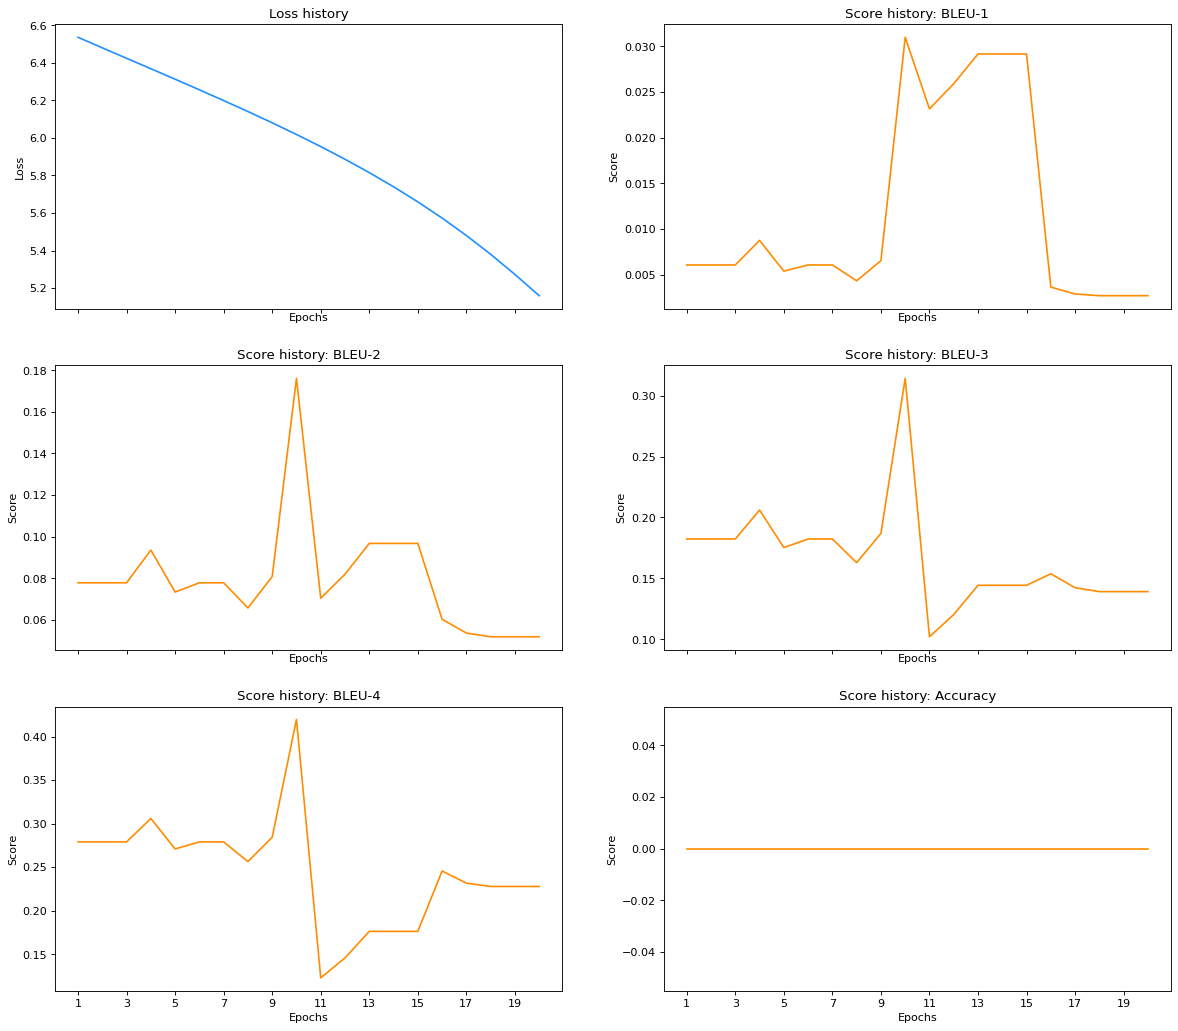

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 3
ncols = 2

fig, ax = plt.subplots(nrows, ncols, sharex=True, figsize=(18, 16), dpi= 80,)

epochs = list(range(1, epoch+2))
epochs_ticks = list(range(1, epoch+2, 2))

i = 0
j = 0

ax[i][j].plot(epochs, loss_history, color='dodgerblue')
ax[i][j].set_title('Loss history')
ax[i][j].set_xlabel('Epochs')
ax[i][j].set_xticks(epochs_ticks)
ax[i][j].set_ylabel('Loss')

for name in score_functions.keys():
    j += 1
    if j >= ncols:
        j = 0
        i += 1
    score_history = [s[name] for s in scores_history]
    ax[i][j].plot(epochs, score_history, color='darkorange')
    ax[i][j].set_title('Score history: {}'.format(name))
    ax[i][j].set_xlabel('Epochs')
    ax[i][j].set_xticks(epochs_ticks)
    ax[i][j].set_ylabel('Score')

plt.show()

In [54]:
examples = zip(dev_source[:10], dev_target[:10], x_development[:10])
for source, target, x in examples:
    y = model(x.unsqueeze(0))
    translation = ' '.join(target_vocab.unidex_words(y[1:-1]))
    source = ' '.join(source)
    references = '\n'.join([' '.join(t) for t in target])

    print('Source: "{}"\nReferences:\n{}\nTranslation: "{}"\n'.format(source, references, translation))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Source: "when does it begin ?"
References:
▁இது ▁எ ப் பொழுது ▁ஆரம்பிக்க ிறது ?
Translation: "▁நான் ▁நான் <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"

Source: "i ' ll see to it ."
References:
▁அதை ▁நான் ▁பார்க்க ிற ேன்
Translation: "▁நான் ▁நான் <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <

In [55]:
test_scores = score(best_model, x_test, test_target)
scores_str = '\n'.join(['{}: {:.4f}'.format(name, score) for name, score in test_scores.items()])
print('Final score:\n' + scores_str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



Final score:
BLEU-1: 0.0024
BLEU-2: 0.0488
BLEU-3: 0.1335
BLEU-4: 0.2208
Accuracy: 0.0000


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
